In [2]:
#Install pandas_profiling for quick and fast EDA
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 4.2 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
     |████████████████████████████████| 4.7 MB 36.3 MB/s 
     |████████████████████████████████| 675 kB 52.6 MB/s 
     |████████████████████████████████| 812 kB 43.0 MB/s 
     |████████████████████████████████| 38.2 MB 77.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0ae8dbf7dc70df361bd3709c87fae348d80757913ffd04ad2659b59da2e9314d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=d544ddfef61ff1c24b8df8b19f06bc38ec5304e81a8eee288cd9467821f803c3
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalli

## import libraries

In [3]:

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import pickle
import re

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.utils import resample, shuffle
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer

import nltk.corpus
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import tokenize


from joblib import dump,load

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
# It's important to get all necessary packages for nltk
# This will take some time
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## Explore data

In [7]:
# Please upload data in the content folder before running cell
df = pd.read_csv('/content/TwitterHate.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
21597,21598,0,i'm so today my small #cousin got his first ...
21598,21599,0,"for #rohingya, fear and forced marriages #traf..."
21599,21600,0,birds &amp; bad #piggies #finger family \ #n...
21600,21601,0,"now that #bfestbuzz is winding down, get for..."


In [8]:

#check for missing data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      21602 non-null  int64 
 1   label   21602 non-null  int64 
 2   tweet   21602 non-null  object
dtypes: int64(2), object(1)
memory usage: 506.4+ KB
None


In [9]:
# no missing data, but the 'label' column is an integer
#convert datatype into categorical
df['label']= df['label'].astype('category')
df.info()
# Why categorical? 
#because ML models learn well with categorical type than Ordinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      21602 non-null  int64   
 1   label   21602 non-null  category
 2   tweet   21602 non-null  object  
dtypes: category(1), int64(1), object(1)
memory usage: 358.8+ KB


## Quick EDA

In [10]:
# Automatic EDA can be generated with pandas_profile
rep1 = ProfileReport(df)
rep1.to_file(output_file='report1.html')
# Note, Incase you are getting 'FILENOT FOUND error, please restart and load runtime

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:

#Toggle to interact with the visualizations
rep1.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:361: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

By toggling the widget, I discovered a lot of infos and features,

The first one is that:
The 'label' variable values is not balanced, 
about 29,720 False (0),
and only 2242 True(s) (1)

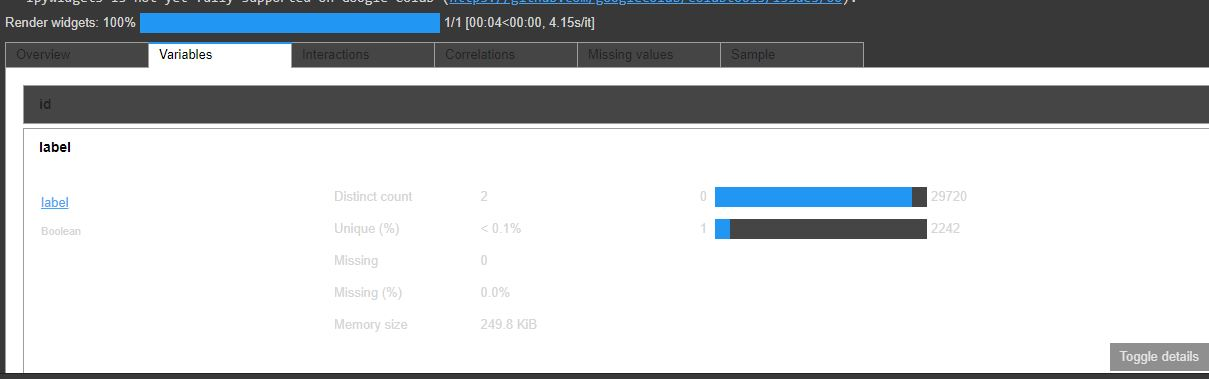

So what do we do?

Well, I have 2 approaches;

1) Downsampling / Upsampling

2) Weighted Loss

3) Ignore and use f1 as evaluation metric

I will go for the 1st one
i.e downsample 0s and upsample 1s

In [12]:
# I Separate the two classes
df_majority = df[df.iloc[:,1]==0]
df_minority = df[df.iloc[:,1]==1]

In [13]:
# I downsampled the majority class (0s) and upsample the minority
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=16000)
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=16000)
# Then I joined both
df1 = pd.concat([df_majority_downsampled, df_minority_upsampled])

# I reshuffled and reset index
df1=shuffle(df1)
df1 = df1.reset_index(drop=True)

In [14]:
#check
try:
  if df1.label.value_counts()[0] == df1.label.value_counts()[1]:
    print(df1.label.value_counts(), '\n Now its balanced')
  else:
    print('Its not balanced but you can leave it if its close')
except:
  print('Something is wrong check your dataset')


1    16000
0    16000
Name: label, dtype: int64 
 Now its balanced


## Time to split data and preprocess it in a pipeline

---



In [15]:
train, test = train_test_split(df1, test_size = 0.2, stratify = df1['label'], random_state=21)

In [16]:
train.shape, test.shape

((25600, 3), (6400, 3))

## Baseline *fitting*

Which model?

2 simple models that I know perform well with Classification problems are Logistic regrssion and Random Forest

I will go with Logistic regression




In [17]:
# create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer(lowercase= True, stop_words=ENGLISH_STOP_WORDS)

# fit the object with the training data tweets
tfidf_vectorizer.fit(train.tweet)

# transform the train and test data
train_idf = tfidf_vectorizer.transform(train.tweet)
test_idf  = tfidf_vectorizer.transform(test.tweet)

# create the object of LinearRegression Model
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(train_idf, train.label)



LogisticRegression()

## Evaluate baseline result

In [18]:
# predict the label on the traning data
predict_train = model_LR.predict(train_idf)

# predict the model on the test data
predict_test = model_LR.predict(test_idf)


# Evaluation metrics
print(classification_report(y_true=test.label, y_pred= predict_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3200
           1       0.95      0.99      0.97      3200

    accuracy                           0.97      6400
   macro avg       0.97      0.97      0.97      6400
weighted avg       0.97      0.97      0.97      6400



SO HOW CAN WE IMPROVE IT?

## Regularization and hyperparameter tuning using stratified k-fold and
## cross-validation to get the best model (I used grid search)


Sometimes, LEMATIZING & STOPWORDS REMOVAL can make a model to perform worse, so they should be treated as hyper parameter optimization 

In [19]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 3), min_df=10)

#Removing punctuations, special characters and lemmatizing words to their base form
df1['tweet'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in df1['tweet']]
df1['tweet'] = df1['tweet'].replace(to_replace = ['user', 'amp', 'sjw', 'retweet'], value = ' ', regex = True)

features = vectorizer.fit_transform(df1['tweet'])
X_train, X_test, y_train, y_test = train_test_split(features, df1.label)
params = {'penalty': ['l1', 'l2'], 'C': [3, 10, 30, 100, 300]}
lrmodel = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid=params, scoring='f1', cv=5, n_jobs=-1)
lrmodel.fit(X_train, y_train)
print("Best parameters found were {} with F1 score of {:.2f}".format(
    lrmodel.best_params_,
    lrmodel.best_score_
))


Best parameters found were {'C': 100, 'penalty': 'l2'} with F1 score of 0.99


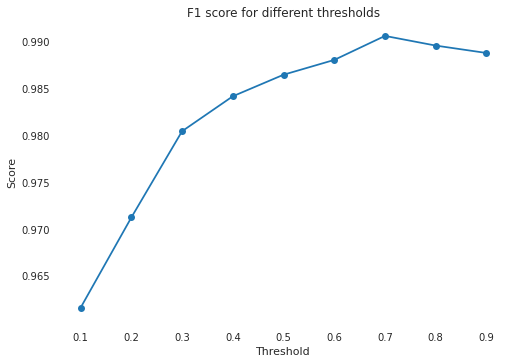

In [20]:
probas = lrmodel.predict_proba(X_test)
thresholds = np.arange(0.1, 1.0, 0.1)
scores = [f1_score(y_test, (probas[:, 1] >= x).astype(int)) for x in thresholds]
plt.plot(thresholds, scores, 'o-')
plt.title("F1 score for different thresholds")
plt.ylabel("Score")
plt.xlabel("Threshold")
plt.show()

## Best parameters found were {'C': 100, 'penalty': 'l2'} at threshold of 0.7

---

with F1 score of 0.97

In [21]:
#Removing punctuations, special characters and lemmatizing words to their base form
df1['tweet'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in df1['tweet']]
df1['tweet'] = df1['tweet'].replace(to_replace = ['user', 'amp', 'sjw', 'retweet'], value = ' ', regex = True)

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 3), min_df=10,  lowercase= True)
features = vectorizer.fit_transform(df1['tweet'])
X_train, X_test, y_train, y_test = train_test_split(features, df1.label)

# define the stages of the pipeline
pipeline = Pipeline(steps= [('model', LogisticRegression(solver='liblinear', max_iter=1000, C = 100, penalty='l2'))])


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Evaluation metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4009
           1       0.98      1.00      0.99      3991

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [22]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 3),  lowercase= True)

#Removing punctuations, special characters and lemmatizing words to their base form
df1['tweet'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in df1['tweet']]
df1['tweet'] = df1['tweet'].replace(to_replace = ['user', 'amp', 'sjw', 'retweet'], value = ' ', regex = True)

features = vectorizer.fit_transform(df1['tweet'])
X_train, X_test, y_train, y_test = train_test_split(features, df1.label)

model_ = LogisticRegression(solver='liblinear', max_iter=1000, C = 100, penalty='l2')


model_.fit(X_train, y_train)

y_pred = model_.predict(X_test)

# Evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3989
           1       1.00      1.00      1.00      4011

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



BETTER

Wait ! What are the words likely to be found in hate tweets?
Lets find out

## Word Cloud

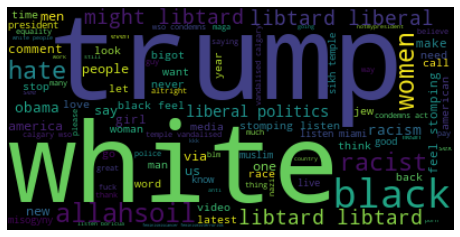

In [23]:
def get_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Storing stopwords of english language from nltk library
sw = set(stopwords.words("english"))

# remove stop words
def filter_words(word_list):
    useful_words = [ w for w in word_list if w not in sw ]
    return(useful_words)

    
def cleaned_tweets(dataset):
    data = dataset.copy()

    #Removing punctuations, special characters and lemmatizing words to their base form
    data['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in data['tweet']]
    data['text_lem'] = data['text_lem'].replace(to_replace = ['user', 'amp', 'sjw', 'retweet'], value = ' ', regex = True)
    a=[]
    for text in data['text_lem']:
        word_list = word_tokenize(text)
        text=filter_words(word_list)
        a.append(text)  
    
    train_text = []
    for i in a:
        sent=''
        for  j in i:
            sent += str(j) + ' '
        train_text.append(sent)

    data['cleaned_tweets'] = train_text
    return train_text

cleaned_hate_tweets =cleaned_tweets(df_minority)
# for hate tweets
get_wordcloud(str(cleaned_hate_tweets))

REMEMBER;
Best parameters found were {'C': 30, 'penalty': 'l2'}

Let's save the model

In [47]:
train, test = train_test_split(df1, test_size = 0.2, stratify = df1['label'], random_state=21)
tfidf_vectorizer.fit(train.tweet)
train_idf = tfidf_vectorizer.transform(train.tweet)
test_idf  = tfidf_vectorizer.transform(test.tweet)
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression(solver='liblinear', max_iter=1000, C = 100, penalty='l2'))])
                            
pipeline.fit(train.tweet, train.label)

dump(pipeline, filename="model_classification.joblib")

['model_classification.joblib']

TEST MODEL

In [48]:
text = ["The advent of social media has increased the occurence of hate speech."]

text = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in text]


# predict the label using the pipeline

if pipeline.predict(text) == 0:
  print("No hate speech found")
else:
  print("HATE SPEECH DETECTED")

No hate speech found


In [49]:
# probaibility of prediction
print(pipeline.predict_proba(text)[0][1] * 100)

42.70029601033163
